In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv(r"C:\Users\91879\Downloads\archive (9)\Default_Fin.csv")

In [4]:
df

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


In [5]:
df.drop("Index" , axis = 1 , inplace = True)

In [6]:
df

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0
...,...,...,...,...
9995,1,8538.72,635908.56,0
9996,1,9095.52,235928.64,0
9997,1,10144.92,703633.92,0
9998,1,18828.12,440029.32,0


<Axes: xlabel='Bank Balance', ylabel='Density'>

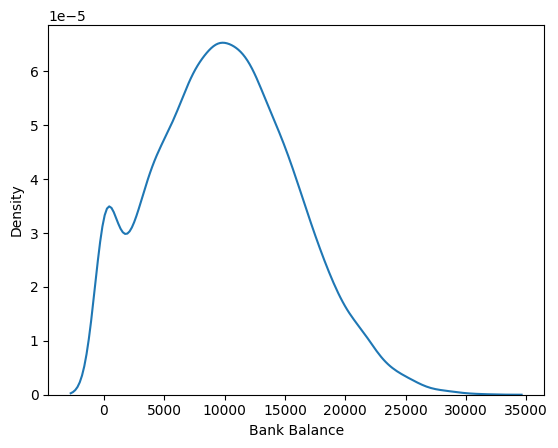

In [7]:
sns.kdeplot(df["Bank Balance"])

<Axes: xlabel='Annual Salary', ylabel='Density'>

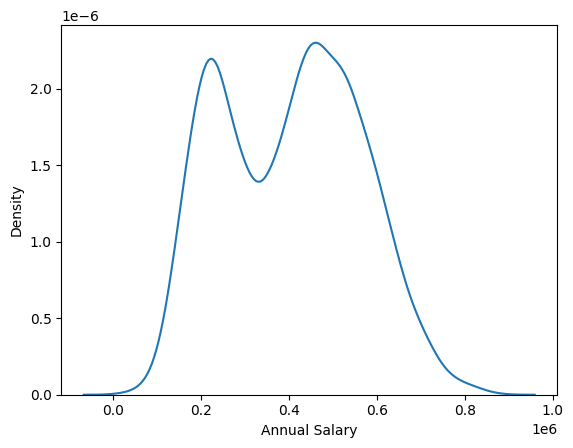

In [8]:
sns.kdeplot(df["Annual Salary"])

<Axes: ylabel='Employed'>

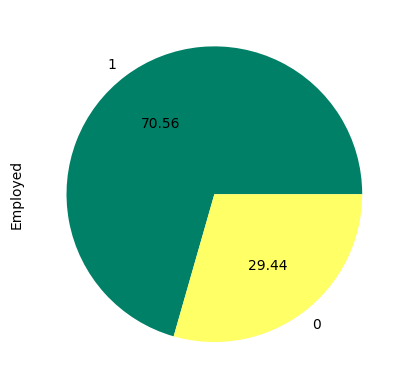

In [9]:
df["Employed"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "summer")

<Axes: ylabel='Defaulted?'>

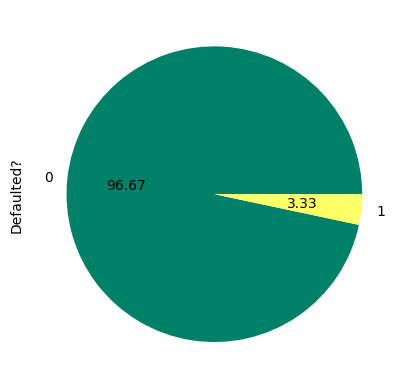

In [10]:
df["Defaulted?"].value_counts().plot(kind = "pie" , autopct = "%.2f" , cmap = "summer")

<Axes: xlabel='Bank Balance', ylabel='Annual Salary'>

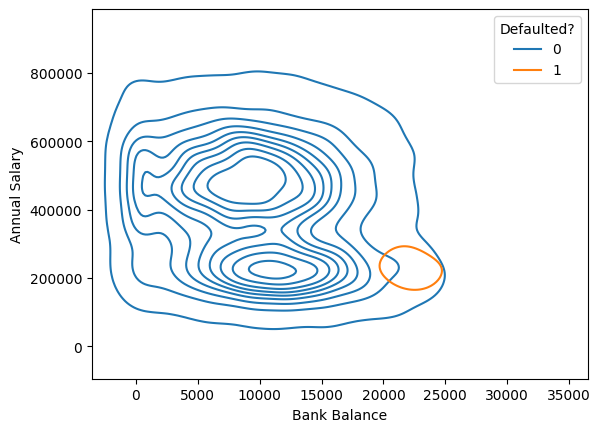

In [11]:
sns.kdeplot(data = df , x = "Bank Balance" , y = "Annual Salary" , hue = "Defaulted?")

In [12]:
train , test = np.split(df.sample(frac = 1) , [int(0.8* len(df))])

In [13]:
def pre(dataframe):
    y = dataframe["Defaulted?"]
    
    x = pd.DataFrame(StandardScaler().fit_transform(dataframe.drop("Defaulted?" , axis = 1)))
    
    return x , y

In [14]:
X_train , Y_train = pre(train)
X_test , Y_test = pre(test)

In [15]:
model_0 = KNeighborsClassifier()
model_0.fit(X_train , Y_train)

KNeighborsClassifier()

In [16]:
model_1 = LogisticRegression()
model_1.fit(X_train , Y_train)

LogisticRegression()

In [17]:
model_2 = GaussianNB()
model_2.fit(X_train , Y_train)

GaussianNB()

In [18]:
model_3 = DecisionTreeClassifier()
model_3.fit(X_train , Y_train)

DecisionTreeClassifier()

In [19]:
model_4 = RandomForestClassifier()
model_4.fit(X_train , Y_train)

RandomForestClassifier()

In [20]:
print("Accracy of " , model_0 , "is" , accuracy_score(Y_test , model_0.predict(X_test)))
print("Accracy of " , model_1 , "is" , accuracy_score(Y_test , model_1.predict(X_test)))
print("Accracy of " , model_2 , "is" , accuracy_score(Y_test , model_2.predict(X_test)))
print("Accracy of " , model_3 , "is" , accuracy_score(Y_test , model_3.predict(X_test)))
print("Accracy of " , model_4 , "is" , accuracy_score(Y_test , model_4.predict(X_test)))

Accracy of  KNeighborsClassifier() is 0.9745
Accracy of  LogisticRegression() is 0.9775
Accracy of  GaussianNB() is 0.9745
Accracy of  DecisionTreeClassifier() is 0.955
Accracy of  RandomForestClassifier() is 0.973


In [21]:
model = Sequential()
model.add(Dense(3 , activation = "relu" , input_dim = 3))
model.add(Dense(3 , activation = "relu" , input_dim = 3))
model.add(Dense(3 , activation = "relu" , input_dim = 3))
model.add(Dense(3 , activation = "relu" , input_dim = 3))
model.add(Dense(3 , activation = "relu" , input_dim = 3))
model.add(Dense(3 , activation = "relu" , input_dim = 3))
model.add(Dense(1 , activation = "relu"))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 3)                 12        
                                                                 
 dense_2 (Dense)             (None, 3)                 12        
                                                                 
 dense_3 (Dense)             (None, 3)                 12        
                                                                 
 dense_4 (Dense)             (None, 3)                 12        
                                                                 
 dense_5 (Dense)             (None, 3)                 12        
                                                                 
 dense_6 (Dense)             (None, 1)                 4

In [23]:
model.compile(loss = "binary_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])

In [24]:
sample_fit = model.fit(X_train , Y_train , epochs = 100 , validation_split = 0.2)

Epoch 1/100
200/200 [==============================] - 2s 2ms/step - loss: 0.5351 - accuracy: 0.9653 - val_loss: 0.5399 - val_accuracy: 0.9650
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5351 - accuracy: 0.9653 - val_loss: 0.5399 - val_accuracy: 0.9650
Epoch 3/100
200/200 [==============================] - 0s 1ms/step - loss: 0.5351 - accuracy: 0.9653 - val_loss: 0.5399 - val_accuracy: 0.9650
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5351 - accuracy: 0.9653 - val_loss: 0.5399 - val_accuracy: 0.9650
Epoch 5/100
200/200 [==============================] - 0s 1ms/step - loss: 0.5351 - accuracy: 0.9653 - val_loss: 0.5399 - val_accuracy: 0.9650
Epoch 6/100
200/200 [==============================] - 0s 1ms/step - loss: 0.5351 - accuracy: 0.9653 - val_loss: 0.5399 - val_accuracy: 0.9650
Epoch 7/100
200/200 [==============================] - 0s 1ms/step - loss: 0.5351 - accuracy: 0.9653 - val_loss: 0.5399 - val_accuracy: 0.9650

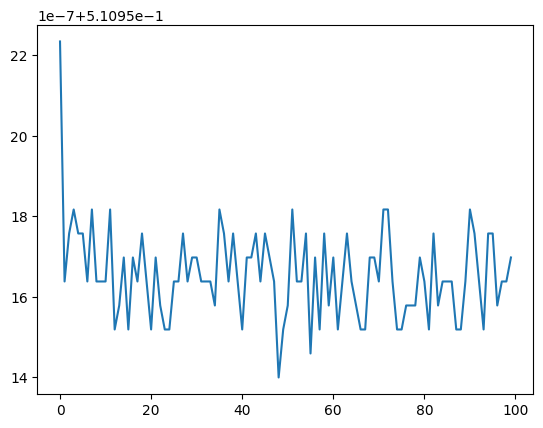

In [29]:
plt.plot(sample_fit.history["loss"])
plt.show()

In [28]:
y_log = model.predict(X_test)
y_pred = np.where(y_log > 0 , 1 , 0)
print(accuracy_score(Y_test , y_pred))

63/63 [==============================] - 0s 788us/step
0.964
